# Cats vs dogs
**Using convoluitonal neural networks to classify images as cats or dogs**

In this demonstration, we'll create a classifier using deep learning - CNN's to be specific.

# What are neural networks?

A neural network is a computational model. . They transform input data by applying a nonlinear function to a weighted sum of the inputs.  

!["NN"](https://cdn-images-1.medium.com/max/1200/1*Uhr-4VDJD0-gnteUNFzZTw.jpeg)

Convolution example:

![alt text](https://cdn-images-1.medium.com/max/1600/1*ZCjPUFrB6eHPRi4eyP6aaA.gif "Logo Title Text 1")


# Building the model



In [1]:
# Import libraries
from keras.preprocessing.image import ImageDataGenerator #to augment training data
from keras.models import Sequential #sequantial layers
from keras.layers import Conv2D, MaxPooling2D #cnn activations
from keras.layers import Activation, Dropout, Flatten, Dense #activations
from keras import backend as K #using tensorflow
import matplotlib.pyplot as plt #for plots

%matplotlib inline # to plot inline

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


Using TensorFlow backend.
UsageError: unrecognized arguments: # to plot inline


## Setup

!["pixels"](pixel.png)

In [3]:
# dimensions of our images.
img_width, img_height = 224, 224 # 224X224 pixels. This is variable. Larger images will give better results but will also be more greedy 

# define folders
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

# define training parameters
nb_train_samples = 2000 # 1000 cats, 1000 dogs
nb_validation_samples = 800
epochs = 50
batch_size = 16

# data format
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

## Model Architecture

In [6]:
# model architecture
model = Sequential() #initiate model 
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 64)        18496     
__________

In [7]:

model.compile(loss='binary_crossentropy', # or categorical_crossentropy
              optimizer='rmsprop',# or adagrad
              metrics=['accuracy'])

In [14]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)

Found 2001 images belonging to 2 classes.
{'dogs': 1, 'cats': 0}


In [15]:

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 1008 images belonging to 2 classes.


## Training the model

It took me ~30 mins to train the CNN using a GTX 1070 GPU

In [16]:
%%time
classifier_model = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose = 0,)


Wall time: 26min 29s


## Accuracy over time

The final accuacy on the training was ~90%

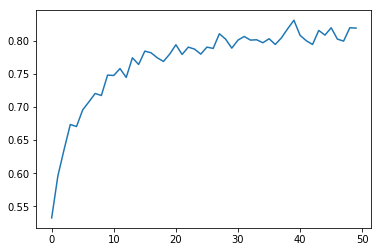

In [18]:
plt.plot((classifier_model.history['acc']))

In [2]:
#Save model
model.save('model.h5')


NameError: name 'model' is not defined